In [77]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [53]:
#read the data
path = 'data/'
local_path = 'data/'

In [54]:
pd.options.mode.chained_assignment = None  # default='warn'  #to suppress SettingWithCopyWarning

#Reading the dataset
dataset = pd.read_csv(local_path + 'Fer2013/icml_face_data.csv')

#Obtaining train data where usage is "Training"
train = dataset[dataset[" Usage"] == "Training"]

#Obtaining test data where usage is "PublicTest"
test = dataset[dataset[" Usage"] == "PublicTest"]


In [55]:
train

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
28704,2,Training,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,Training,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,Training,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,Training,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [56]:
#Converting " " separated pixel values to list
train[' pixels'] = train[' pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test[ ' pixels'] = test[' pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
dataset[' pixels'] = dataset[' pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

In [60]:
train

,emotion,Usage,pixels
0,0,Training,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...."
1,0,Training,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111..."
2,2,Training,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161..."
3,4,Training,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...."
4,6,Training,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
28704,2,Training,"[84.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85...."
28705,0,Training,"[114.0, 112.0, 113.0, 113.0, 111.0, 111.0, 112..."
28706,4,Training,"[74.0, 81.0, 87.0, 89.0, 95.0, 100.0, 98.0, 93..."
28707,0,Training,"[222.0, 227.0, 203.0, 90.0, 86.0, 90.0, 84.0, ..."


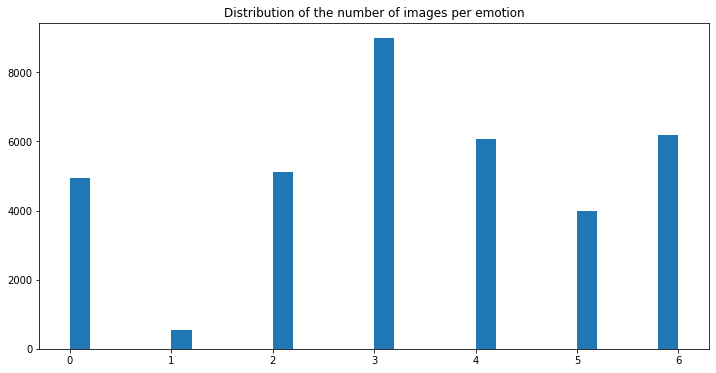

In [61]:
plt.figure(figsize=(12,6))
plt.hist(dataset['emotion'], bins=30)
plt.title("Distribution of the number of images per emotion")
plt.show()

In [62]:
print(train.shape)
print(test.shape)


(28709, 3)
(3589, 3)


In [63]:
##Create the data set
shape_x = 48
shape_y = 48

In [100]:
#train
X_train = train.iloc[:, 2].values
y_train = train.iloc[:, 0].values

#test
X_test = test.iloc[:, 2].values
y_test = test.iloc[:, 0].values

#all
X = dataset.iloc[:,2].values
y = dataset.iloc[:,0].values

In [101]:
print(X_train.shape)
print(X_train[0].shape)

(28709,)
(2304,)


In [102]:
#np.vstack stack arrays in sequence vertically (picking element row wise)
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
X = np.vstack(X)

In [103]:
# :)

print(X_train.shape)
print(X_train[0].shape)

(28709, 2304)
(2304,)


In [104]:
#Reshape X_train, y_train,X_test,y_test in desired formats
X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

X = np.reshape(X, (X.shape[0],48,48,1))
y = np.reshape(y, (y.shape[0],1))

print("Shape of X_train and y_train is " + str(X_train.shape) +" and " + str(y_train.shape) +" respectively.")
print("Shape of X_test and y_test is " + str(X_test.shape) +" and " + str(y_test.shape) +" respectively.")

Shape of X_train and y_train is (28709, 48, 48, 1) and (28709, 1) respectively.
Shape of X_test and y_test is (3589, 48, 48, 1) and (3589, 1) respectively.


In [105]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X = X.astype('float32')

In [106]:
#Feature Scaling
# Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255
X /= 255

In [107]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)
y_labels_one_hot = to_categorical(y)

In [109]:
#Define Labels

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [110]:
#Defining labels 
def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

Text(0.5, 1.0, 'Ground Truth : Surprise')

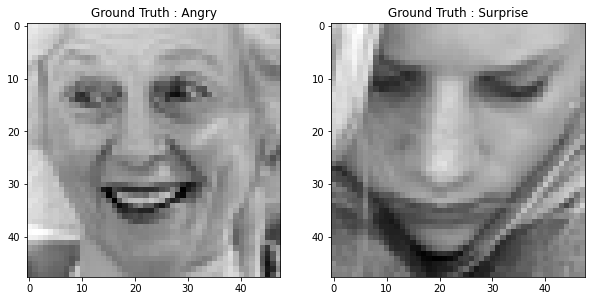

In [111]:
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(np.squeeze(X_train[25,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[0]))))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(np.squeeze(X_test[26,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1500]))))

In [112]:
# Detect Face

def detect_face(frame):
    
    #Cascade classifier pre-trained model
    cascPath = '/usr/local/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml'
    faceCascade = cv2.CascadeClassifier(cascPath)
    
    #BGR -> Gray conversion
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #Cascade MultiScale classifier
    detected_faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=6,
                                                  minSize=(shape_x, shape_y),
                                                  flags=cv2.CASCADE_SCALE_IMAGE)
    coord = []
    
    for x, y, w, h in detected_faces :
        if w > 100 :
            sub_img=frame[y:y+h,x:x+w]
            #cv2.rectangle(frame,(x,y),(x+w,y+h),(0, 255,255),1)
            coord.append([x,y,w,h])
    
    return gray, detected_faces, coord

In [ ]:
#Extraire les features faciales
def extract_face_features(faces, offset_coefficients=(0.075, 0.05)):
    gray = faces[0]
    detected_face = faces[1]
    
    new_face = []
    
    for det in detected_face :
        #Region dans laquelle la face est détectée
        x, y, w, h = det
        #X et y correspondent à la conversion en gris par gray, et w, h correspondent à la hauteur/largeur
    
        #Offset coefficient, np.floor takes the lowest integer (delete border of the image)
        horizontal_offset = np.int(np.floor(offset_coefficients[0] * w))
        vertical_offset = np.int(np.floor(offset_coefficients[1] * h))

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #gray transforme l'image
        extracted_face = gray[y+vertical_offset:y+h, x+horizontal_offset:x-horizontal_offset+w]
    
        #Zoom sur la face extraite
        new_extracted_face = zoom(extracted_face, (shape_x / extracted_face.shape[0],shape_y / extracted_face.shape[1]))
        #cast type float
        new_extracted_face = new_extracted_face.astype(np.float32)
        #scale
        new_extracted_face /= float(new_extracted_face.max())
        #print(new_extracted_face)
    
        new_face.append(new_extracted_face)
    
    return new_face